#Image Binarization

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f021dd51490>,
 Text(0.5, 1.0, 'Histogram'))

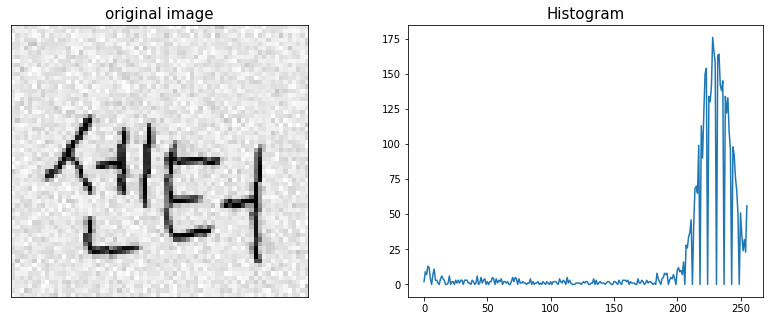

In [ ]:
image = cv2.imread('./img0001.png', 0)

hist, bin_edges = np.histogram(image, bins=256)

plt.figure(figsize=(14,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.plot(hist),plt.title('Histogram',fontsize=15)

Otsu's algorithm implementation thresholding result:  157.998046875


(Text(0.5, 0, 'pixel values'), Text(0, 0.5, 'variance'))

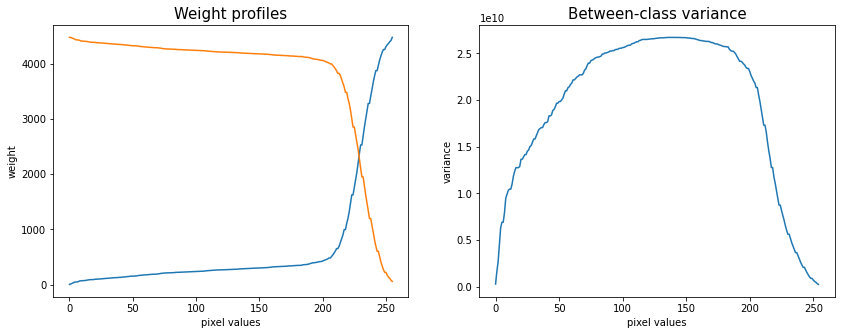

In [ ]:
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

print("Otsu's algorithm implementation thresholding result: ", threshold)


# Plotting weight and between-class variance
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(weight1)
plt.plot(weight2)
plt.title('Weight profiles',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('weight')

plt.subplot(122)
plt.plot(inter_class_variance)
plt.title('Between-class variance',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('variance')

In [ ]:
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_threshold)

158.0


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

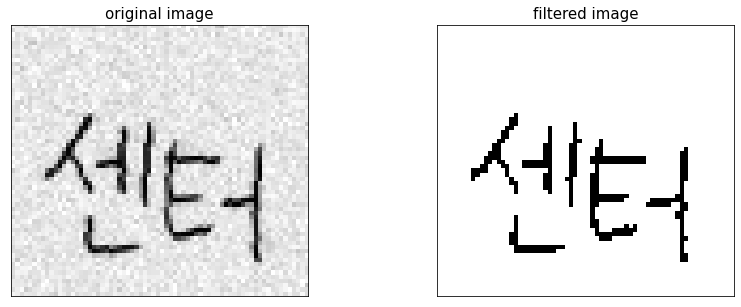

In [ ]:
th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=(14,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('filtered image',fontsize=15)
plt.xticks([]), plt.yticks([])

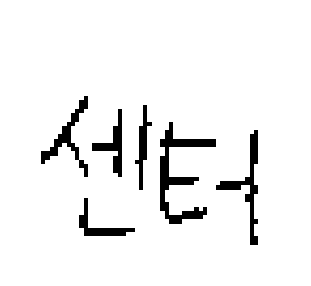

In [ ]:
plt.figure(figsize=(14,5))
plt.axis('off') 
plt.imshow(dst,cmap = 'gray')
plt.savefig('test7.png')

In [ ]:
image = cv2.imread('./img.png', cv2.IMREAD_GRAYSCALE)

hist, bin_edges = np.histogram(image, bins=256)

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

th, dst = cv2.threshold(image, otsu_threshold, 255, cv2.THRESH_BINARY)

cv2.imwrite('./binarization.png', dst)

True

#Erosion

In [ ]:
imgGray = cv2.imread('./img.png',cv2.IMREAD_GRAYSCALE)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
erosion = cv2.erode(imgGray, k)
cv2_imshow(erosion)

#Dialation

In [ ]:
imgGray = cv2.imread('./img.png',cv2.IMREAD_GRAYSCALE)
m = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.dilate(imgGray, m)
cv2_imshow(dst)